# Take some flare light curves and find the general shape 
## by looking at the elastic mean

##### We can cheat, and not use Julia while using Julia, and call Python `scikit-fda` instead.

In [26]:
Pkg.add("DataFrames")
using DataFrames

 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
  [a93c6f00] + DataFrames v0.20.2
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]


In [1]:
using CSV

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1273


In [4]:
f = CSV.File("../flare_snippets/0000000029780677_2_106969.csv");

In [10]:
# using FITSIO # read in .fits files
# using CSV # read in .csv files
using PyCall # call python packages from Julia
# using PyPlot # use matploblib for plotting
using Printf #just for fun

fda = pyimport("skfda"); #import scikit-fda for functional data analysis

In [90]:
using PyPlot

In [365]:
df = CSV.read("../flare_tables/20200227_vetted_flares_lacking_some.csv") |> DataFrame!
df = dropmissing(df, :real)
df = dropmissing(df, :st);



In [366]:
df = df[df.real .== 1,:] 
df = df[df.complex .== 0, :]
df = df[df.ampl_rec .> .05, :]
#df = df[df.ampl_rec .< 1., :]
df = df[(df.cstop-df.cstart) .< 39, :]
df = df[(df.cstop-df.cstart) .> 5, :]
n = size(df,1);
@printf "Sample size: %d" n

Sample size: 84

In [368]:
df6 =  df[df.st .== 6,:]
df7 =  df[df.st .> 6,:];

In [371]:
size(df),size(df6),size(df7)

((84, 36), (57, 36), (27, 36))

  0.000290 seconds (49 allocations: 2.500 KiB)
  0.000050 seconds (20 allocations: 864 bytes)
  3.535702 seconds (20 allocations: 864 bytes)
  2.356042 seconds (20 allocations: 848 bytes)
  0.000265 seconds (49 allocations: 2.500 KiB)
  0.000042 seconds (20 allocations: 864 bytes)
  2.409560 seconds (20 allocations: 864 bytes)
  1.618908 seconds (20 allocations: 848 bytes)
  0.000297 seconds (49 allocations: 2.500 KiB)
  0.000041 seconds (20 allocations: 864 bytes)
  1.147814 seconds (20 allocations: 864 bytes)


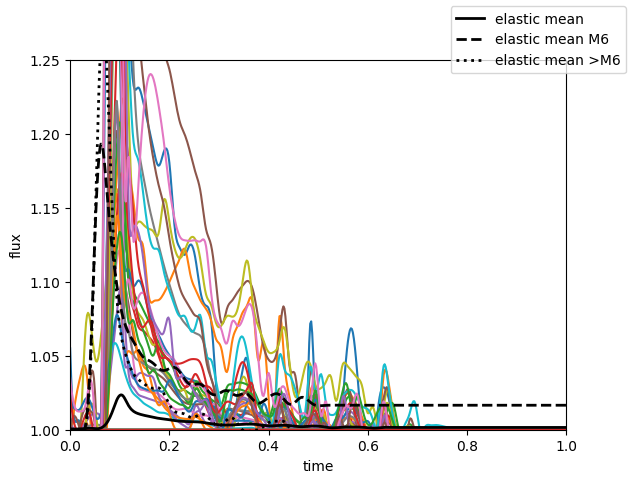

  0.770878 seconds (20 allocations: 848 bytes)


In [364]:
a = ones(Float32, size(df, 1), 96);

for i=1:n
    tic, sector, cstart = df[i,[:TIC,:sector,:cstart]]
    s = string(lpad(string(tic),16,"0"), "_", sector, "_", cstart, ".csv")
    f = CSV.read(string("../flare_snippets/",s))
    a[i,1:size(f)[1]] =  f.f
end

@time dat = fda.representation.grid.FDataGrid(a, axes_labels=["time", "flux"])
@time dat.interpolator = fda.representation.interpolation.SplineInterpolator(3)
@time reg = fda.preprocessing.registration.elastic_registration(dat);
@time elmean = fda.preprocessing.registration.elastic_mean(dat);

fig = reg.plot()
elmean.plot(fig=fig, label="elastic mean", linewidth=2, color="k", )
#fig.axes[1].set_ylim(1.,1.4)


#------------------------------------------------------------
a = ones(Float32, size(df6, 1), 96);
n = size(df6,1);

for i=1:n
    tic, sector, cstart = df6[i,[:TIC,:sector,:cstart]]
    s = string(lpad(string(tic),16,"0"), "_", sector, "_", cstart, ".csv")
    f = CSV.read(string("../flare_snippets/",s))
    a[i,1:size(f)[1]] =  f.f
end

@time dat = fda.representation.grid.FDataGrid(a, axes_labels=["time", "flux"])
@time dat.interpolator = fda.representation.interpolation.SplineInterpolator(3)
@time reg = fda.preprocessing.registration.elastic_registration(dat);
@time elmean = fda.preprocessing.registration.elastic_mean(dat);

elmean.plot(fig=fig, label="elastic mean M6", linewidth=2, color="k", linestyle="dashed" )

#------------------------------------------------------------
a = ones(Float32, size(df7, 1), 96);
n = size(df7,1);

for i=1:n
    tic, sector, cstart = df7[i,[:TIC,:sector,:cstart]]
    s = string(lpad(string(tic),16,"0"), "_", sector, "_", cstart, ".csv")
    f = CSV.read(string("../flare_snippets/",s))
    a[i,1:size(f)[1]] =  f.f
end

@time dat = fda.representation.grid.FDataGrid(a, axes_labels=["time", "flux"])
@time dat.interpolator = fda.representation.interpolation.SplineInterpolator(3)
@time reg = fda.preprocessing.registration.elastic_registration(dat);
@time elmean = fda.preprocessing.registration.elastic_mean(dat);

elmean.plot(fig=fig, label="elastic mean >M6", linewidth=2, color="k", linestyle="dotted" )
fig.axes[1].set_ylim(1.,1.25)
fig.axes[1].set_xlim(0.,1.)
fig.legend();
fig.savefig("equal_M6.png")

In [372]:
elmean

PyObject FDataGrid(
    array([[[0.99853945],
            [0.99754512],
            [0.99654051],
            [1.00237369],
            [1.0510132 ],
            [1.16799342],
            [1.26875202],
            [1.2460442 ],
            [1.15364282],
            [1.08691597],
            [1.05927616],
            [1.0469202 ],
            [1.03855797],
            [1.03413518],
            [1.03148955],
            [1.02895464],
            [1.02808696],
            [1.02825851],
            [1.02418858],
            [1.017018  ],
            [1.01241528],
            [1.01138665],
            [1.01046156],
            [1.00849494],
            [1.00880893],
            [1.01048063],
            [1.00959646],
            [1.00599946],
            [1.00318399],
            [1.00328266],
            [1.00654517],
            [1.00803726],
            [1.0044582 ],
            [0.99989809],
            [0.99870302],
            [0.99955797],
            [1.00004499],
            [1.002

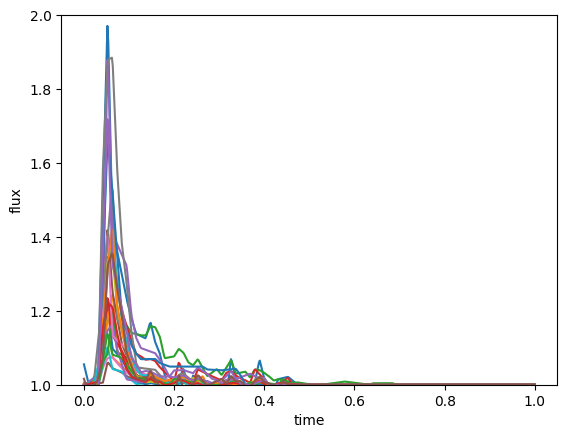

(1.0, 2)

In [313]:
#elastic_registration = reg.ElasticRegistration()
#fd_align = reg.fit_transform()
#fd_align.dataset_label += " - aligned"

fig = reg.plot()
fig.axes[1].set_ylim(1.,2)

[youtube](https://www.youtube.com/watch?v=kicmlIr2vzA)
[views vs. copies](https://docs.julialang.org/en/v1/manual/performance-tips/index.html#Consider-using-views-for-slices-1)